<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;"
>
<h3>Demo Lecture #4: BIS 411 - Storytelling with Data</h3>
<h3>Lecture Topic: Fundamentals of Data Manipulation</h3>
<p> </p>
<h3>This demo is an analytics drilling down and parsing a simple, but multi-layer visualization.</h3>
</div>

In [1]:
# Check for the latest versions and install if not up to date.
# if you do not need to update a package, you can comment it out by adding a # in front of the line

### Python Version 3.12.6

#%pip install pandas --upgrade
#%pip install numpy --upgrade
#%pip install seaborn --upgrade
#%pip install matplotlib --upgrade
#%pip install jupyter --upgrade
#%pip install statsmodels --upgrade
#%pip install jupyterlab --upgrade
#%pip install ipywidgets --upgrade
#%pip install python --upgrade
#%pip install python-pptx --upgrade
#%pip install pandas --upgrade
#%pip install requests --upgrade
#%pip install openpyxl --upgrade
#%pip install xlrd --upgrade
#%pip install tabulate --upgrade
#%pip install os --upgrade  
#%pip install scipy --upgrade

import os   #importing os library
import pandas as pd     #importing pandas library 
import numpy as np    #importing numpy library 
import seaborn as sns   #importing seaborn library
import matplotlib.pyplot as plt  #importing matplotlib library
import jupyter    #importing jupyter library
import jupyterlab   #importing jupyterlab library
from pptx import Presentation #importing pptx library
from pptx.util import Inches  #importing Inches from pptx.util
import openpyxl #importing openpyxl library
import scipy as stats #importing scipy library
import tabulate #importing tabulate library
import requests #importing requests library
import xlrd #importing xlrd library
import statsmodels #importing statsmodels library
#import statsmodels.api as sm #importing statsmodels.api as sm
#import statsmodels.formula.api as smf #importing statsmodels.formula.api as smf
import statsmodels.stats.api as sms #importing statsmodels.stats.api as sms
import statsmodels.stats.outliers_influence as oi #importing statsmodels.stats.outliers_influence as oi
import statsmodels.stats.diagnostic as dg #importing statsmodels.stats.diagnostic as dg
import statsmodels.stats.stattools as st #importing statsmodels.stats.stattools as st
import statsmodels.stats.power as sp #importing statsmodels.stats.power as sp
import statsmodels.stats.proportion as spp #importing statsmodels.stats.proportion as spp
import statsmodels.stats.weightstats as sw #importing statsmodels.stats.weightstats as sw
import statsmodels.stats.multicomp as smm #importing statsmodels.stats.multicomp as smm
import statsmodels.stats.libqsturng as sl #importing statsmodels.stats.libqsturng as sl
import statsmodels.stats.moment_helpers as sh #importing statsmodels.stats.moment_helpers as sh

<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;"
>
<h4>Bring in Insurance.csv data file</h4>
<p> <p>
<h5>Review Layout using Data Wrangler</h5>
</div>

In [1]:
# Clear the environment, do not add a comment after the %reset -f command
%reset -f  

### Bringing in the Data Set   

# Load libraries and set up the environment
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check the current working directory
print(os.getcwd())

# Change current path to where your data files are stored
data_path = '/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python'
os.chdir(data_path)
print(os.getcwd())

Insurance = pd.read_csv('insurance.csv')

/
/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python


<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;"
>
<h5>Run a Scatter Plot of Ages vs. Insurance Premium</h5>
<p> <p>
<h5>Hypothesis would indicate Insurance Premium would increase with Age</h5>
</div>

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           4.89e-29
Time:                        20:08:22   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

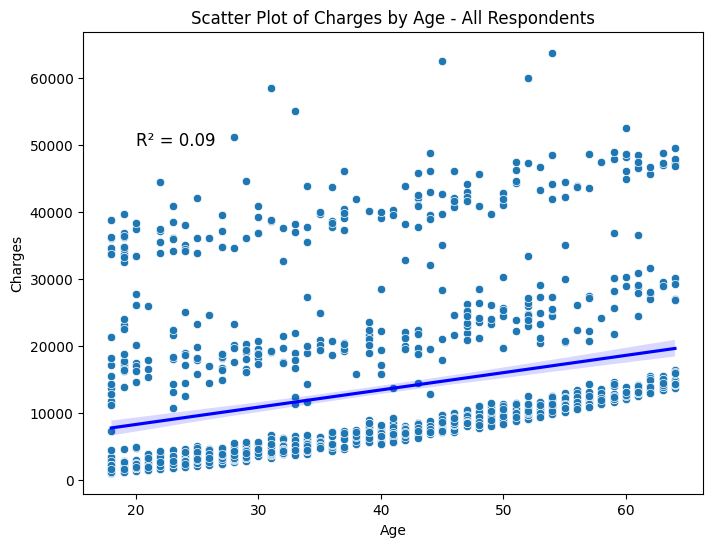

In [2]:
# Importing required libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df_insu = Insurance.copy()

# It is a good practice to copy your dataframe before making any changes to it. 
# This way, you can always refer back to the original data if needed.


# Review in Data Wrangler

# Building linear regression model between charges and age
X = df_insu['age']
y = df_insu['charges']
X = sm.add_constant(X)  # Adds a constant term to the predictor

lm_charges_age = sm.OLS(y, X).fit()

# Displaying the summary of the linear regression model
print(lm_charges_age.summary())

# Scatter plot with linear regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', data=df_insu)
sns.regplot(x='age', y='charges', data=df_insu, scatter=False, color='blue', line_kws={"label":f"R^2 = {lm_charges_age.rsquared:.2f}"})

# Displaying R^2 value on the plot
plt.text(20, 50000, f'R² = {lm_charges_age.rsquared:.2f}', fontsize=12)

# Adding labels and title
plt.title("Scatter Plot of Charges by Age - All Respondents")
plt.xlabel("Age")
plt.ylabel("Charges")

# Showing the plot
plt.show()

<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;"
>
<h4>The R2 is low, but there appears to be a strong relationship amoung lower premium</h4>
<p> <p>
<h5>This scatterplots indicates that there may be at least three factors effecting the Premium vs. Age Relationships</h5>
</div>

/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python
/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           4.89e-29
Time:                        21:08:22   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                         

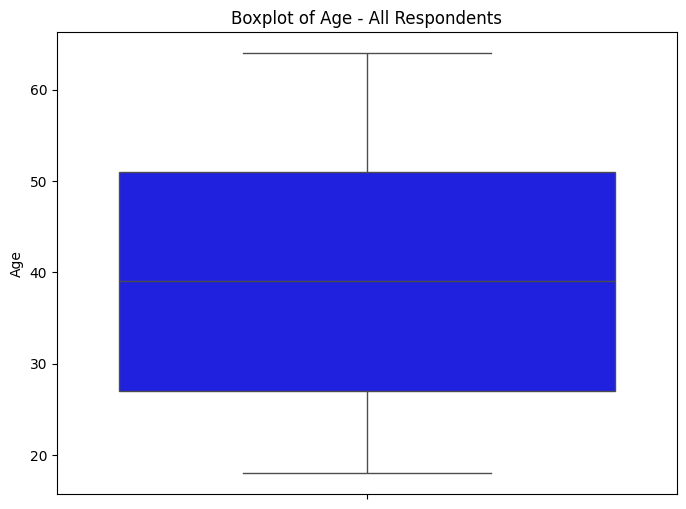

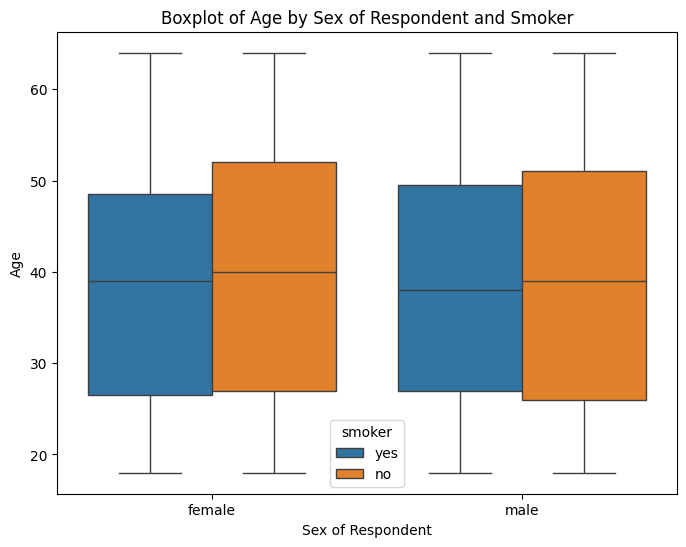

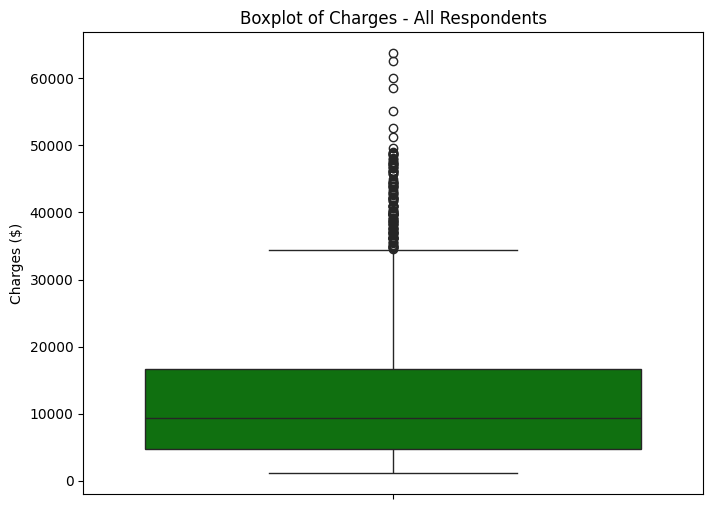

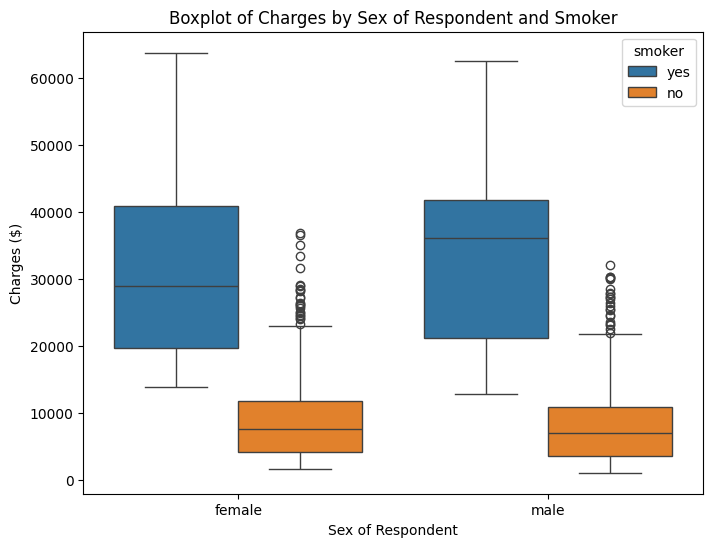

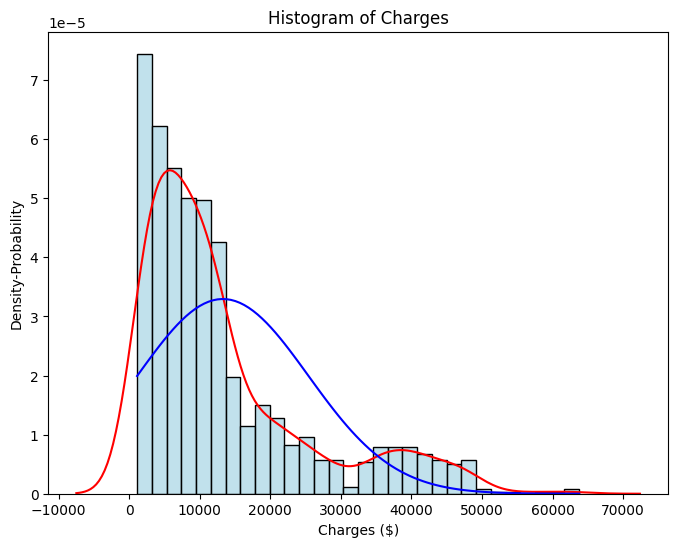

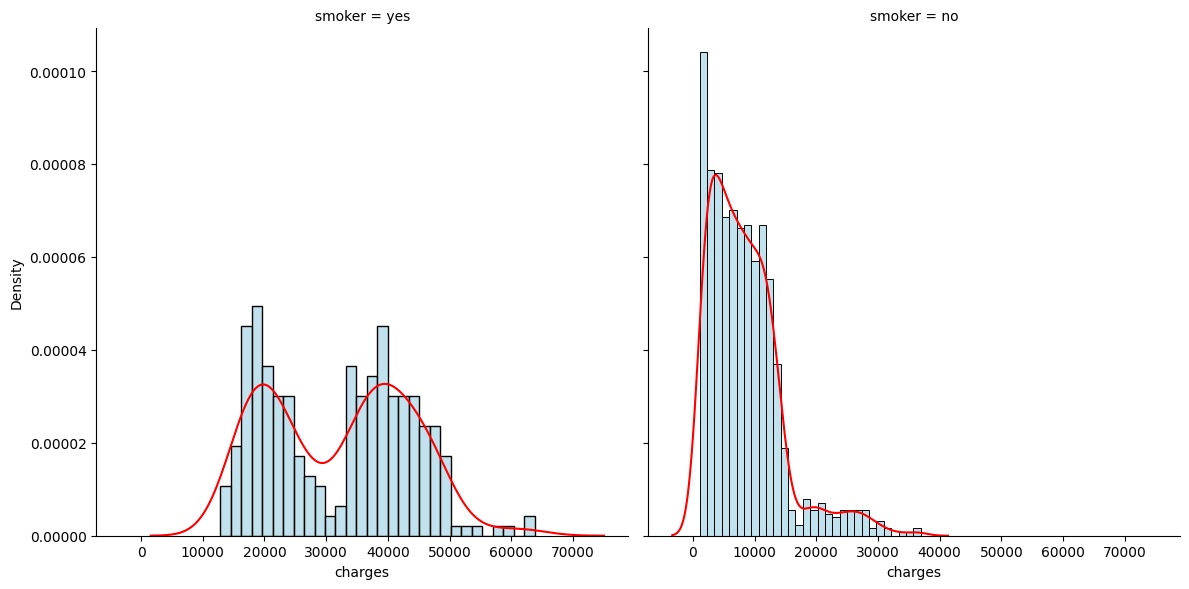

In [8]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt


import os

# Check the current working directory
print(os.getcwd())

# Change current path to where your data files are stored
data_path = '/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python'
os.chdir(data_path)
print(os.getcwd())

Insurance = pd.read_csv('insurance.csv')


df_insu = Insurance.copy()


# Summary of the linear regression model
X = df_insu['age']
y = df_insu['charges']
X = sm.add_constant(X)
lm_charges_age = sm.OLS(y, X).fit() # Fit the linear regression model to the data 
print(lm_charges_age.summary())

# Frequency tables for categorical variables
print(df_insu['region'].value_counts())  # Frequency table for region
print(df_insu['sex'].value_counts())     # Frequency table for sex
print(df_insu['smoker'].value_counts())  # Frequency table for smoker

# Boxplot of age
plt.figure(figsize=(8,6))
sns.boxplot(data=df_insu, y='age', color='blue')
plt.title("Boxplot of Age - All Respondents")
plt.ylabel("Age")
plt.show()

# Boxplot of charges by sex and smoker status with facet wrap for smoker status
plt.figure(figsize=(8,6))
sns.boxplot(data=df_insu, x='sex', y='age', hue='smoker')
plt.title("Boxplot of Age by Sex of Respondent and Smoker")
plt.xlabel("Sex of Respondent")
plt.ylabel("Age")
plt.show()

# Boxplot of charges
plt.figure(figsize=(8,6))
sns.boxplot(data=df_insu, y='charges', color='green')
plt.title("Boxplot of Charges - All Respondents")
plt.ylabel("Charges ($)")
plt.show()

# Boxplot of charges by sex and smoker status with facet wrap for smoker status
plt.figure(figsize=(8,6))
sns.boxplot(data=df_insu, x='sex', y='charges', hue='smoker')
plt.title("Boxplot of Charges by Sex of Respondent and Smoker")
plt.xlabel("Sex of Respondent")
plt.ylabel("Charges ($)")
plt.show()

# Histogram of charges with density and normal distribution fit
plt.figure(figsize=(8,6))
sns.histplot(df_insu['charges'], kde=False, bins=30, color='lightblue', stat='density')
sns.kdeplot(df_insu['charges'], color='red')

mean_charges = df_insu['charges'].mean()
std_charges = df_insu['charges'].std()
x = np.linspace(df_insu['charges'].min(), df_insu['charges'].max(), 100)

plt.plot(x, norm.pdf(x, mean_charges, std_charges), color='blue')
plt.title("Histogram of Charges")
plt.xlabel("Charges ($)")
plt.ylabel("Density-Probability")
plt.show()

# Histogram of charges by smoker status with density and normal distribution fit
g = sns.FacetGrid(df_insu, col='smoker', height=6)
g.map(sns.histplot, 'charges', kde=False, bins=30, color='lightblue', stat='density')
g.map(sns.kdeplot, 'charges', color='red')

<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;"
>
<h4>The R2 is low, but there appears to be a strong relationship amoung lower premium</h4>
<p> <p>
<h5>This scatterplots indicates that there may be at least three factors effecting the Premium vs. Age Relationships</h5>
</div>

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN

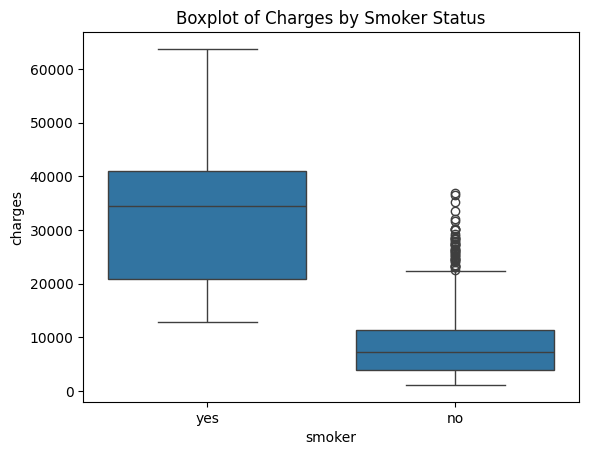

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


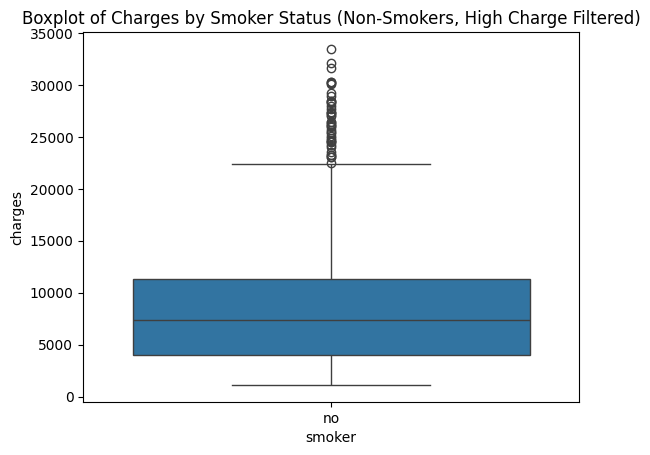

               age          bmi     children       charges
count  1061.000000  1061.000000  1061.000000   1061.000000
mean     39.331762    30.648992     1.086711   8355.712011
std      14.066527     6.048599     1.216251   5816.761930
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.315000     0.000000   3981.976800
50%      40.000000    30.305000     1.000000   7337.748000
75%      52.000000    34.430000     2.000000  11353.227600
max      64.000000    53.130000     5.000000  33471.971890


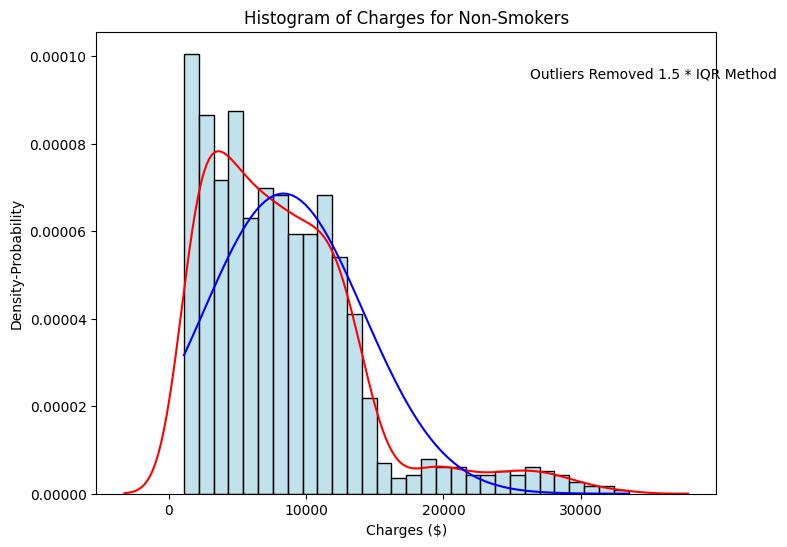

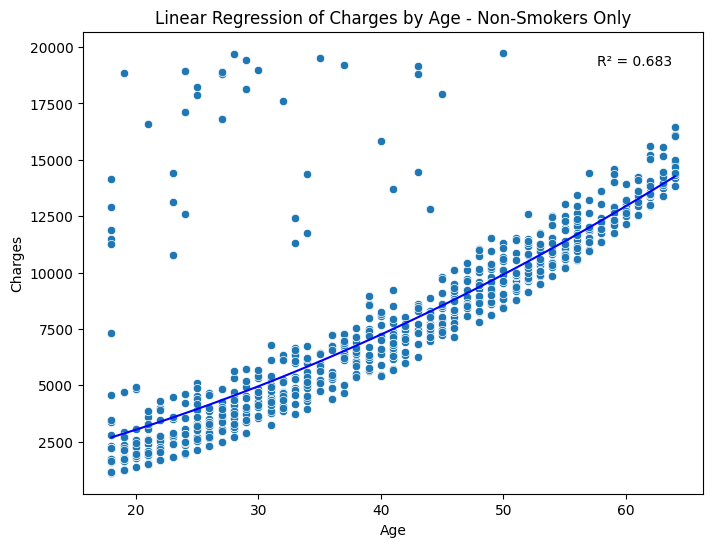

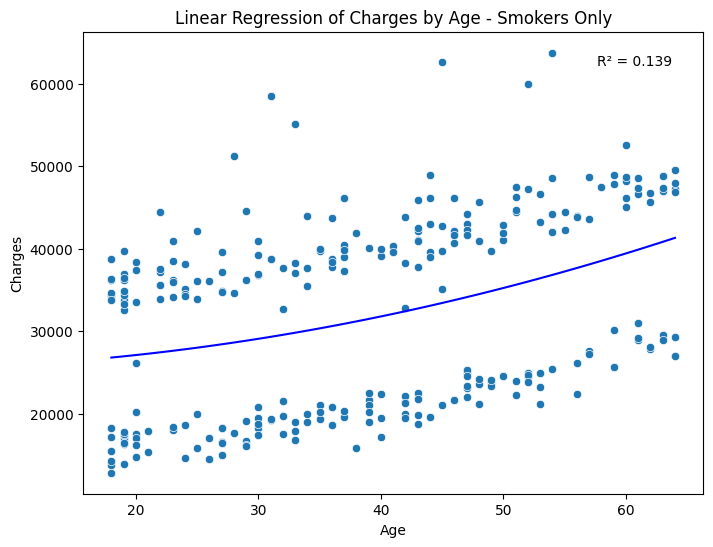

In [9]:
# Required libraries

%pip install sklearn --upgrade
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr, norm
import statsmodels.api as sm
from numpy.polynomial.polynomial import Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import os

# Check the current working directory
print(os.getcwd())

# Change current path to where your data files are stored
data_path = '/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python'
os.chdir(data_path)
print(os.getcwd())

Insurance = pd.read_csv('insurance.csv')


df_insu = Insurance.copy()

### Group comparison with groupby in pandas
df_insu.groupby('smoker')['charges'].mean()

### Boxplot
sns.boxplot(x='smoker', y='charges', data=df_insu)
plt.title('Boxplot of Charges by Smoker Status')
plt.show()

# Summary statistics
print(df_insu['charges'].describe())

# Calculate Interquartile Range (IQR)
IQR_Charges = iqr(df_insu['charges'])

# Filtering non-smokers with charges less than the IQR rule
upper_limit = 1.5 * IQR_Charges + df_insu['charges'].quantile(0.75)
df_insu_nonsmoker_Highcharge = df_insu[(df_insu['smoker'] == 'no') & (df_insu['charges'] < upper_limit)]

# Boxplot for filtered non-smokers
sns.boxplot(x='smoker', y='charges', data=df_insu_nonsmoker_Highcharge)
plt.title('Boxplot of Charges by Smoker Status (Non-Smokers, High Charge Filtered)')
plt.show()

# Summary statistics for filtered data
print(df_insu_nonsmoker_Highcharge.describe())

# Histogram and density plot for non-smokers
plt.figure(figsize=(8,6))
sns.histplot(df_insu_nonsmoker_Highcharge['charges'], bins=30, stat="density", color='lightblue', edgecolor='black')
sns.kdeplot(df_insu_nonsmoker_Highcharge['charges'], color='red')
mean_charges = df_insu_nonsmoker_Highcharge['charges'].mean()
std_charges = df_insu_nonsmoker_Highcharge['charges'].std()
x = np.linspace(df_insu_nonsmoker_Highcharge['charges'].min(), df_insu_nonsmoker_Highcharge['charges'].max(), 100)
plt.plot(x, norm.pdf(x, mean_charges, std_charges), color='blue')
plt.title('Histogram of Charges for Non-Smokers')
plt.xlabel('Charges ($)')
plt.ylabel('Density-Probability')
plt.annotate('Outliers Removed 1.5 * IQR Method', xy=(0.7, 0.9), xycoords='axes fraction')
plt.show()

### Rerun Linear Model
# Create a subset with only non-smokers and charges less than 20k
df_insu_nonsmoker_Highcharge = df_insu[(df_insu['smoker'] == 'no') & (df_insu['charges'] < 20000)]

# Fit 2nd degree polynomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_insu_nonsmoker_Highcharge[['age']])
lm = LinearRegression().fit(X_poly, df_insu_nonsmoker_Highcharge['charges'])
r_squared = lm.score(X_poly, df_insu_nonsmoker_Highcharge['charges'])

# Scatter plot with 2nd degree polynomial line
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', data=df_insu_nonsmoker_Highcharge)
X_vals = np.linspace(df_insu_nonsmoker_Highcharge['age'].min(), df_insu_nonsmoker_Highcharge['age'].max(), 100)
X_vals_poly = poly.fit_transform(X_vals.reshape(-1, 1))
plt.plot(X_vals, lm.predict(X_vals_poly), color='blue')
plt.annotate(f'R² = {r_squared:.3f}', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
plt.title('Linear Regression of Charges by Age - Non-Smokers Only')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### Create a subset with only smokers
df_insu_smokers = df_insu[df_insu['smoker'] == 'yes']

# Fit 2nd degree polynomial for smokers
X_poly_smokers = poly.fit_transform(df_insu_smokers[['age']])
lm_smokers = LinearRegression().fit(X_poly_smokers, df_insu_smokers['charges'])
r_squared_smokers = lm_smokers.score(X_poly_smokers, df_insu_smokers['charges'])

# Scatter plot for smokers with 2nd degree polynomial line
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', data=df_insu_smokers)
X_vals_smokers = np.linspace(df_insu_smokers['age'].min(), df_insu_smokers['age'].max(), 100)
X_vals_poly_smokers = poly.fit_transform(X_vals_smokers.reshape(-1, 1))
plt.plot(X_vals_smokers, lm_smokers.predict(X_vals_poly_smokers), color='blue')
plt.annotate(f'R² = {r_squared_smokers:.3f}', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
plt.title('Linear Regression of Charges by Age - Smokers Only')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

/var/folders/rd/bzzc96fj7v9frj3zp_zwgn100000gn/T/ipykernel_32669/158754212.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insu_smokers['premium'] = pd.cut(df_insu_smokers['charges'], bins=[30000, np.inf], labels=["30000+"])
/var/folders/rd/bzzc96fj7v9frj3zp_zwgn100000gn/T/ipykernel_32669/158754212.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cross_tab_smokers = df_insu_smokers.groupby('premium').agg(


  premium  count   mean_age  mean_bmi  mean_children  mean_charges
0  30000+    152  39.335526  35.06273          1.125  41294.115057
T-test Smokers' Charges vs BMI: TtestResult(statistic=np.float64(45.92255556600008), pvalue=np.float64(1.1809235111571466e-189), df=np.float64(546.0))
T-test Non-Smokers' Charges vs BMI: TtestResult(statistic=np.float64(55.51378971166418), pvalue=np.float64(0.0), df=np.float64(2004.0))
T-test All Respondents' Charges vs BMI: TtestResult(statistic=np.float64(39.99111666529812), pvalue=np.float64(1.5383565479089667e-274), df=np.float64(2674.0))


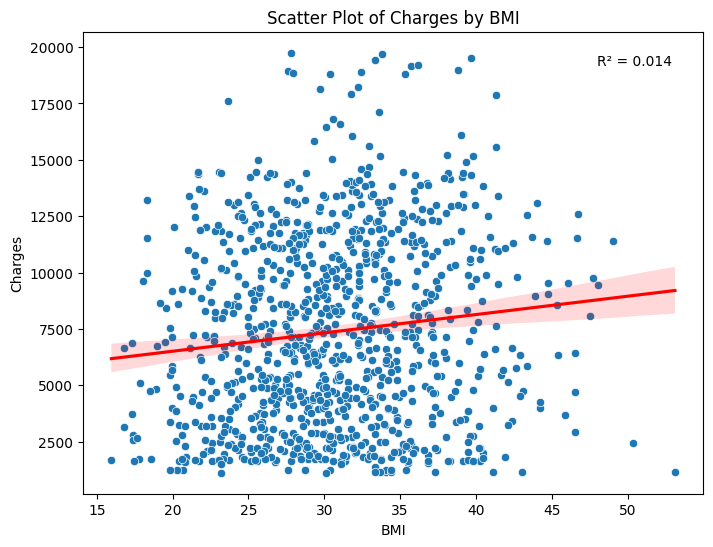

<Figure size 800x600 with 0 Axes>

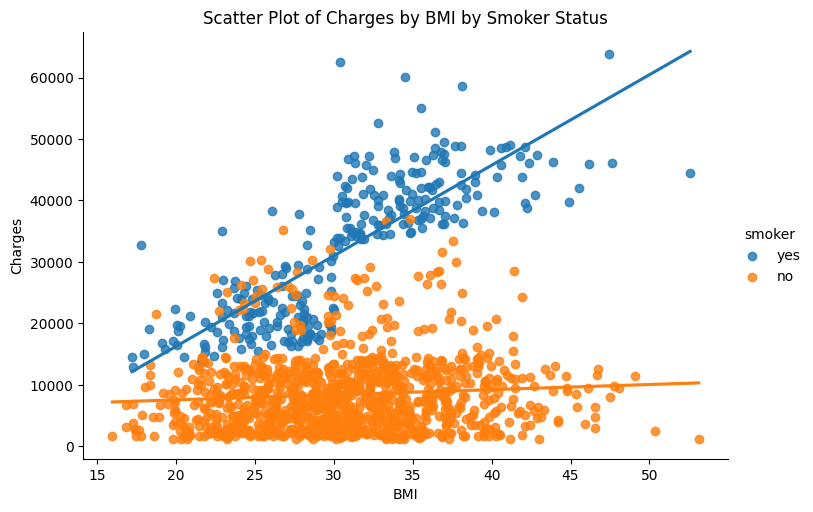

   children   avg_charges  count
0         0  12365.975602    574
1         1  12731.171832    324
2         2  15073.563734    240
3         3  15355.318367    157
4         4  13850.656311     25
5         5   8786.035247     18
  smoker   avg_charges    avg_bmi  count
0     no   8434.268298  30.651795   1064
1    yes  32050.231832  30.708449    274
smoker              no           yes
children                            
0          7611.793335  31341.363954
1          8303.109350  31822.654334
2          9493.093674  33844.235755
3          9614.519391  32724.915268
4         12121.344408  26532.276933
5          8183.845556  19023.260000


/var/folders/rd/bzzc96fj7v9frj3zp_zwgn100000gn/T/ipykernel_32669/158754212.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_smoker_summary = df_insu.groupby(['age_binned', 'smoker']).agg(


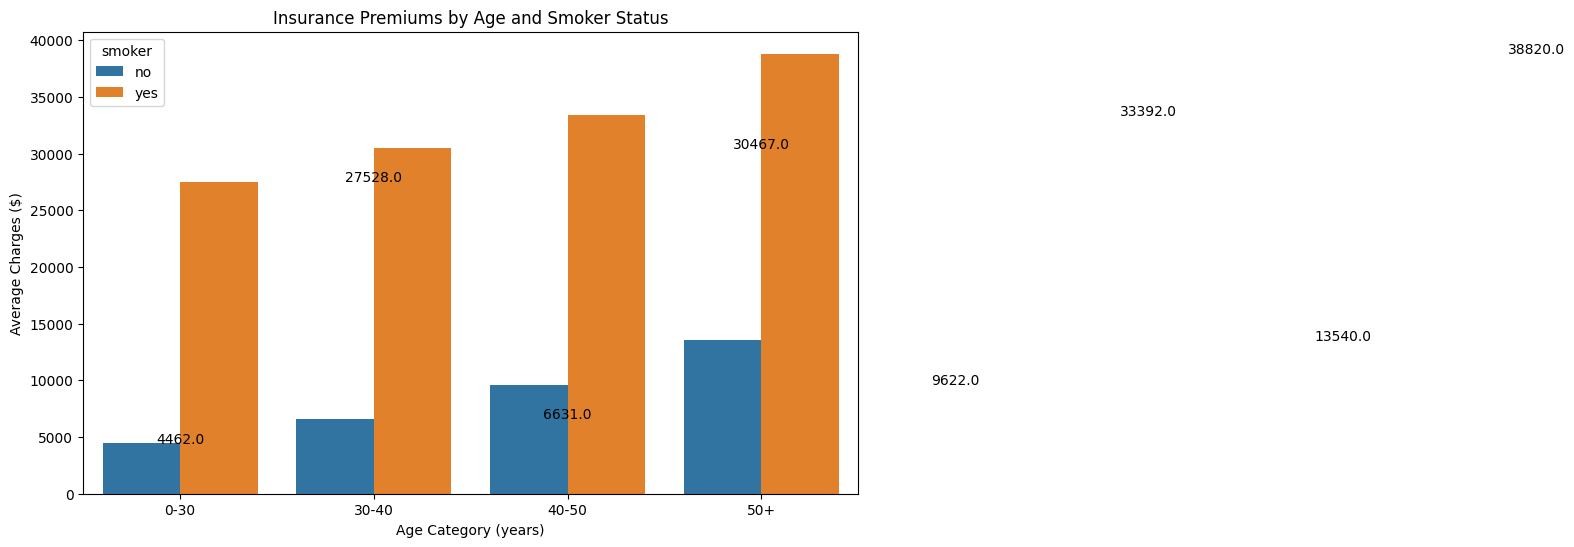

In [10]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df_insu is the dataframe
df_insu = Insurance.copy()

### Create a subset of df_insu with Smokers Only and Premium Breaks
df_insu_smokers = df_insu[df_insu['smoker'] == 'yes']

df_insu_smokers['premium'] = pd.cut(df_insu_smokers['charges'], bins=[30000, np.inf], labels=["30000+"])

cross_tab_smokers = df_insu_smokers.groupby('premium').agg(
    count=('charges', 'size'),
    mean_age=('age', 'mean'),
    mean_bmi=('bmi', 'mean'),
    mean_children=('children', 'mean'),
    mean_charges=('charges', 'mean')
).reset_index()

print(cross_tab_smokers)

### T-Tests to Compare Charges for Smokers, Non-Smokers, and All Respondents
# T-test between smokers' charges and BMI
t_test_smokers = stats.ttest_ind(df_insu_smokers['charges'], df_insu_smokers['bmi'], nan_policy='omit')
print("T-test Smokers' Charges vs BMI:", t_test_smokers)

# T-test between non-smokers' charges and BMI (using df_insu_nonsmoker_Highcharge dataset)
t_test_nonsmokers = stats.ttest_ind(df_insu_nonsmoker_Highcharge['charges'], df_insu_nonsmoker_Highcharge['bmi'], nan_policy='omit')
print("T-test Non-Smokers' Charges vs BMI:", t_test_nonsmokers)

# T-test for all respondents (using df_insu)
t_test_all = stats.ttest_ind(df_insu['charges'], df_insu['bmi'], nan_policy='omit')
print("T-test All Respondents' Charges vs BMI:", t_test_all)

### Scatter Plot of BMI by Charges with Linear Regression Line
# Fitting a linear regression model
X = df_insu_nonsmoker_Highcharge[['bmi']]
y = df_insu_nonsmoker_Highcharge['charges']
X = sm.add_constant(X)
lm_charges_bmi = sm.OLS(y, X).fit()

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='charges', data=df_insu_nonsmoker_Highcharge)
sns.regplot(x='bmi', y='charges', data=df_insu_nonsmoker_Highcharge, scatter=False, color='red')
plt.annotate(f'R² = {lm_charges_bmi.rsquared:.3f}', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
plt.title('Scatter Plot of Charges by BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Scatter Plot of Charges by BMI, Facet by Smoker Status
plt.figure(figsize=(8,6))
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df_insu, aspect=1.5, ci=None)
plt.title('Scatter Plot of Charges by BMI by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Drill Down into the Data
# Group by number of children and calculate average charges and count
df_children_summary = df_insu.groupby('children').agg(
    avg_charges=('charges', 'mean'),
    count=('charges', 'size')
).reset_index()
print(df_children_summary)

# Group by smoker status and calculate average charges and average BMI
df_smoker_summary = df_insu.groupby('smoker').agg(
    avg_charges=('charges', 'mean'),
    avg_bmi=('bmi', 'mean'),
    count=('charges', 'size')
).reset_index()
print(df_smoker_summary)

### Create a formatted summary table showing the average charges
# Cross-tabulation: average charges by number of children and smoker status
df_avg_charges_by_children_smoker = pd.pivot_table(df_insu, values='charges', index='children', columns='smoker', aggfunc='mean')
print(df_avg_charges_by_children_smoker)

### Cluster Bar Chart of Mean Charges by Age and Smoker Status
# Create binned value for age
df_insu['age_binned'] = pd.cut(df_insu['age'], bins=[0, 30, 40, 50, np.inf], labels=['0-30', '30-40', '40-50', '50+'])

# Group by age_binned and smoker, then calculate average charges
df_age_smoker_summary = df_insu.groupby(['age_binned', 'smoker']).agg(
    avg_charges=('charges', 'mean')
).reset_index()

# Clustered bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='age_binned', y='avg_charges', hue='smoker', data=df_age_smoker_summary)
for index, row in df_age_smoker_summary.iterrows():
    plt.text(row.name, row.avg_charges, f"{round(row.avg_charges, 0)}", color='black', ha="center")
plt.title('Insurance Premiums by Age and Smoker Status')
plt.xlabel('Age Category (years)')
plt.ylabel('Average Charges ($)')
plt.show()

/var/folders/rd/bzzc96fj7v9frj3zp_zwgn100000gn/T/ipykernel_32669/744226526.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_insu.groupby(['age_binned', 'smoker']).agg(avg_charges=('charges', 'mean')).reset_index()


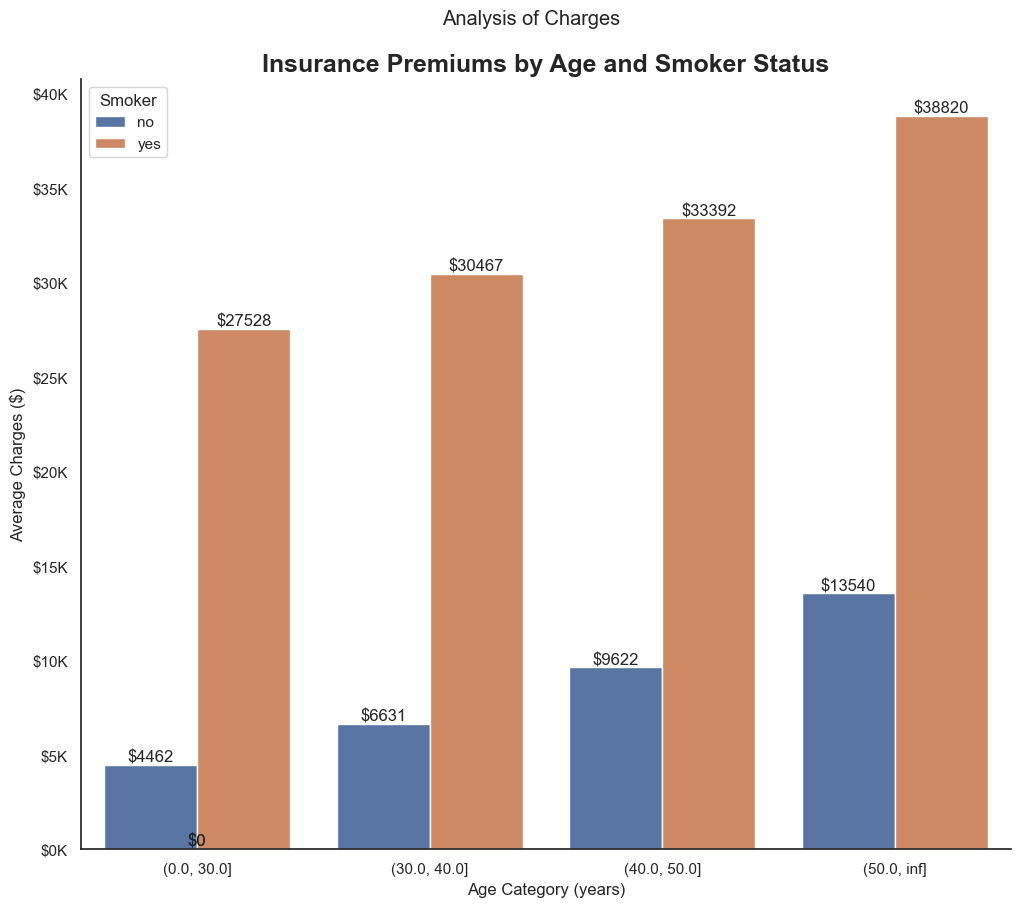

In [32]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter

# Assuming df_insu is your DataFrame
df_insu['age_binned'] = pd.cut(df_insu['age'], bins=[0, 30, 40, 50, float('inf')])

# Group by age_binned and smoker, then calculate the mean of charges
grouped_df = df_insu.groupby(['age_binned', 'smoker']).agg(avg_charges=('charges', 'mean')).reset_index()

# Set the theme first
sns.set_theme(style='white') # Then create the figure
plt.figure(figsize=(12, 10))

ax = sns.barplot(data=grouped_df, x='age_binned', y='avg_charges', hue='smoker')

plt.title("Insurance Premiums by Age and Smoker Status", fontsize=18, fontweight='bold')
plt.suptitle("Analysis of Charges", y=0.95)
plt.xlabel("Age Category (years)")
plt.ylabel("Average Charges ($)")
plt.legend(title='Smoker')
plt.grid(False)

xlabels = [f"{cat.left}-{cat.right}" for cat in grouped_df['age_binned'].cat.categories]

# Function to format the y-axis
def thousands_formatter(x, pos):
    return f'${x / 1000:.0f}K'

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))


sns.despine()

# Loop to annotate the bars with the values
for p in ax.patches:
    ax.annotate(f"${p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()